Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering
techniques to a real-world dataset.
Dataset
Use the Iris dataset available in the sklearn library.
Key components to be fulfilled :
Loading and Preprocessing (1 mark)
● Load the Iris dataset from sklearn.
● Drop the species column since this is a clustering problem.
Clustering Algorithm Implementation (8 marks): Implement the following two clustering algorithms:
1. KMeans Clustering (4 marks) :
● Provide a brief description of how KMeans clustering works.
● Explain why KMeans clustering might be suitable for the Iris dataset.
● Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.
2. Hierarchical Clustering (4 marks):
● Provide a brief description of how Hierarchical clustering works.
● Explain why Hierarchical clustering might be suitable for the Iris dataset.
● Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

Timely Submission (1 mark)
Submission Guidelines Provide your code in a Jupyter Notebook format and submit the GitHub link here.
Ensure your explanations and answers are clear and concise.
Total Score: 10

In [143]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [144]:
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True).frame
iris_dataset.head()
iris_dataset['target'].value_counts()
iris_data_agglo=iris_dataset.copy()
#as the problem to be soved is unsupervised we will drop the target column
iris_data=iris_dataset.drop(['target'],axis=1)
iris_data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
iris_data.shape
iris_data.info()#There is no numm values 
iris_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


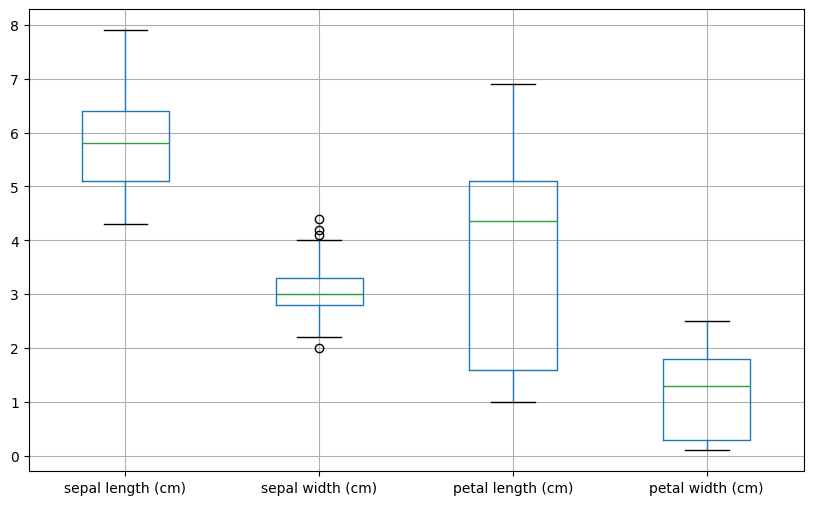

In [146]:
iris_data.boxplot(figsize=(10,6))
plt.show()  

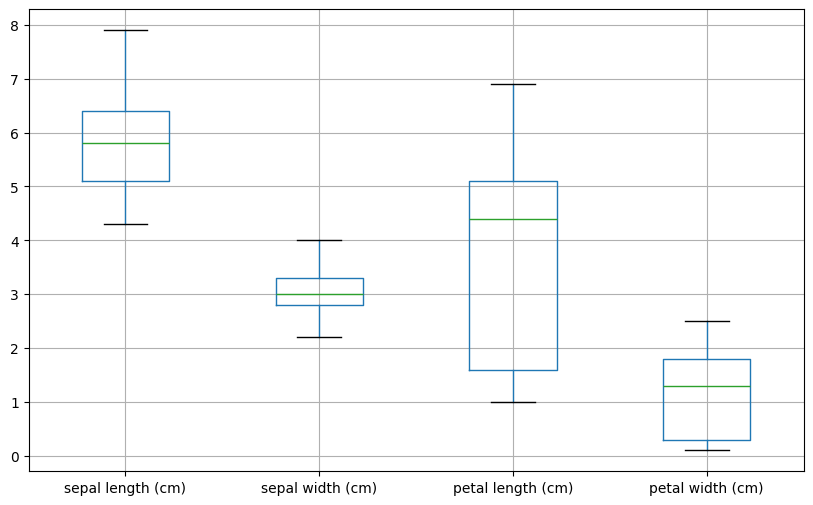

In [147]:
#Removing outliers from sepal width
q1=iris_data['sepal width (cm)'].quantile(0.25)
q2=iris_data['sepal width (cm)'].quantile(0.75)
iqr=q2-q1   
lower_bound=q1-1.5*iqr
upper_bound=q2+1.5*iqr
iris_data=iris_data[(iris_data['sepal width (cm)']>lower_bound) & (iris_data['sepal width (cm)']<upper_bound)]
iris_data.boxplot(figsize=(10,6))
plt.show()


In [148]:
#Saling the data 
scaler=StandardScaler() # range is -1 to 1
iris_scaled_data=scaler.fit_transform(iris_data)
iris_scaled_data #its in array format 
iris_scaled_data=pd.DataFrame(iris_scaled_data,columns=iris_data.columns)
iris_scaled_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525
5,-0.549605,2.168009,-1.202532,-1.084250
6,-1.512032,0.906936,-1.373764,-1.216388
7,-1.030819,0.906936,-1.316687,-1.348525
8,-1.752639,-0.354137,-1.373764,-1.348525
9,-1.151122,0.150292,-1.316687,-1.480662


Model Building -KMeans

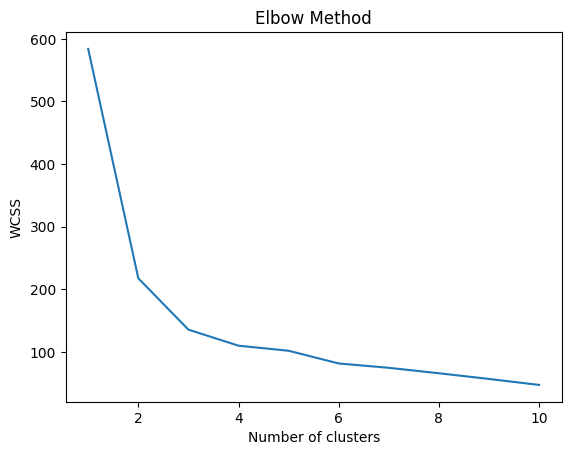

In [149]:
#figuring out the optimal number of clusters using elbow method
wcss=[]
for i in range(1,11):   
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(iris_scaled_data)
    wcss.append(kmeans.inertia_)    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')  
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# WCSS gives the intra cluster tightness.As the number of clusters increases,the WCSS decreases.
# The optimal number of clusters is at the elbow point where the WCSS starts to decrease more slowly  .
#The tightness can be obtained from the inertia_ attribute of the KMeans object.
#From the plot we can see that the elbow point is ranging between 2 -3 clusters.
#We will choose 3 clusters for the time being

In [150]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(iris_scaled_data)
#cluster details will be in the parmeter called kmeans_labels_
iris_scaled_data['kmeans_cluster']=kmeans.labels_
iris_scaled_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster
0,-0.910515,1.159151,-1.373764,-1.348525,2
1,-1.151122,-0.101922,-1.373764,-1.348525,2
2,-1.391729,0.402507,-1.430841,-1.348525,2
3,-1.512032,0.150292,-1.316687,-1.348525,2
4,-1.030819,1.411365,-1.373764,-1.348525,2


In [151]:
iris_scaled_data['kmeans_cluster'].value_counts()


kmeans_cluster
1    51
0    49
2    46
Name: count, dtype: int64

In [152]:
#To evaluate the clustering performance ,we can use silhouette_score
silhouette_score(iris_scaled_data.drop(['kmeans_cluster'],axis=1),iris_scaled_data['kmeans_cluster'])
#silhouette score -1 indicates incorresct clustering,0 indicates overlapping clusters and 1 indicates ,good clustering
#when checked with the cluster number 3 ,got .46 as the silhouette score but with 2 clusters got .55.But in real dataste with labels,it has 3 classes.
#Hence,we will stick to 3 clusters


np.float64(0.46003837910849643)

Visulaization using 3dplot

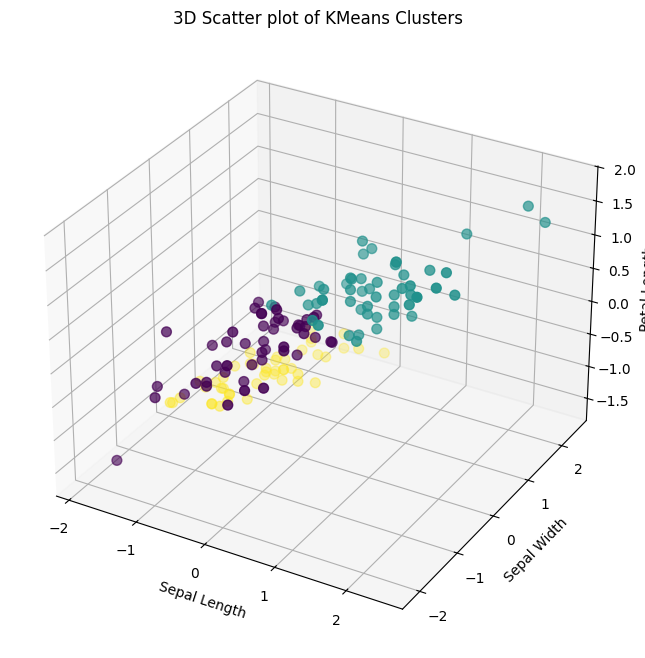

In [153]:
# to visualize in3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_scaled_data['sepal length (cm)'], iris_scaled_data['sepal width (cm)'], iris_scaled_data['petal length (cm)'], c=iris_scaled_data['kmeans_cluster'], cmap='viridis', s=50)
ax.set_xlabel('Sepal Length')   
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter plot of KMeans Clusters')
plt.show()


Hierarchical Clustering

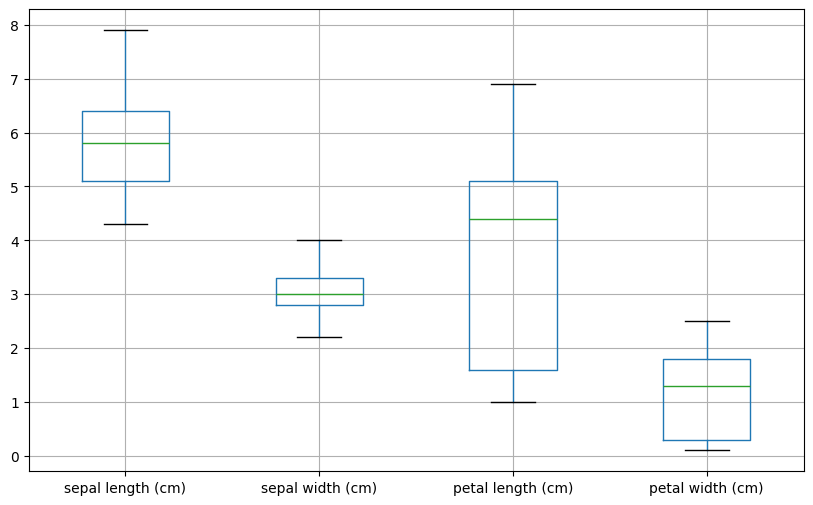

In [154]:
#Removing outliers from sepal width
q1=iris_data_agglo['sepal width (cm)'].quantile(0.25)
q2=iris_data_agglo['sepal width (cm)'].quantile(0.75)
iqr=q2-q1   
lower_bound=q1-1.5*iqr
upper_bound=q2+1.5*iqr
iris_data_agglo=iris_data_agglo[(iris_data_agglo['sepal width (cm)']>lower_bound) & (iris_data_agglo['sepal width (cm)']<upper_bound)]
iris_data.boxplot(figsize=(10,6))
plt.show()



scaler_agglo=StandardScaler() # range is -1 to 1
iris_scaled_data_agglo=scaler_agglo.fit_transform(iris_data)
iris_scaled_data_agglo #its in array format 
iris_scaled_data_agglo=pd.DataFrame(iris_scaled_data_agglo,columns=iris_data.columns)
iris_scaled_data_agglo.head(10)
iris_scaled_data_dbscan=iris_scaled_data_agglo.copy()

In [155]:
iris_scaled_data_agglo.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525


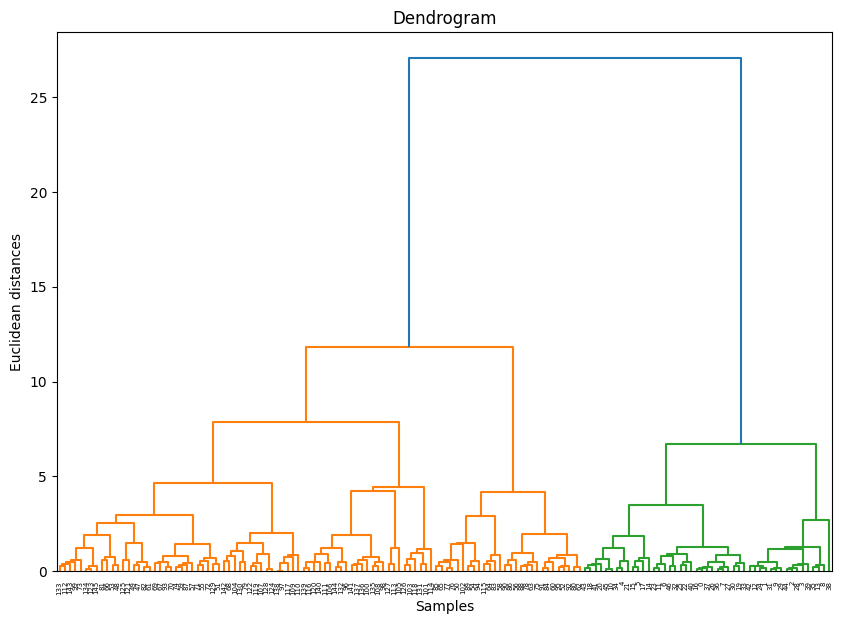

In [156]:


from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(iris_scaled_data_agglo,metric='euclidean', method='ward')
plt.figure(figsize=(10, 7)) 
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


Applying Agglomerative Hierarchical Clustering

In [157]:
agglo_cluster = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
agglo_cluster.fit(iris_scaled_data_agglo)
iris_scaled_data_agglo['agglo_cluster']=agglo_cluster.labels_
iris_scaled_data_agglo['agglo_cluster'].value_counts()
silhouette_score(iris_scaled_data_agglo.drop(['agglo_cluster'],axis=1),iris_scaled_data_agglo['agglo_cluster'])


np.float64(0.4294317131450985)

In [158]:
iris_scaled_data_agglo['agglo_cluster'].value_counts()

agglo_cluster
0    71
1    47
2    28
Name: count, dtype: int64

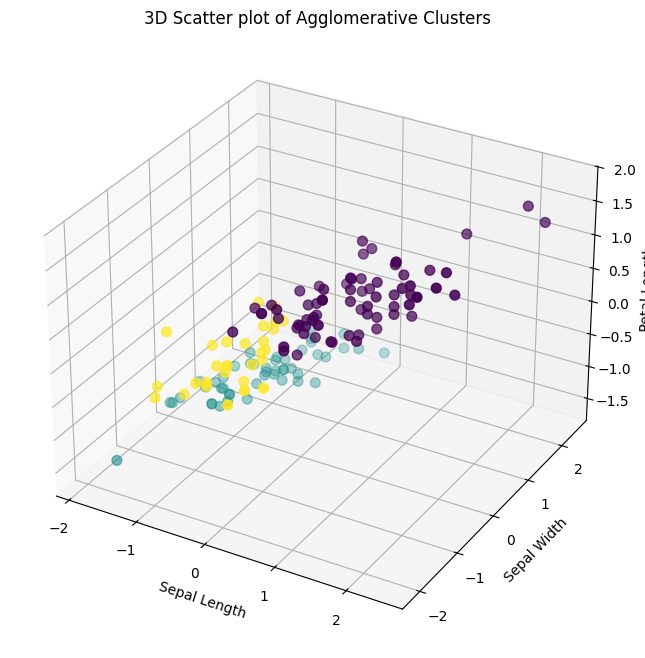

In [159]:
# to visualize in3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_scaled_data_agglo['sepal length (cm)'], iris_scaled_data_agglo['sepal width (cm)'], iris_scaled_data_agglo['petal length (cm)'], c=iris_scaled_data_agglo['agglo_cluster'], cmap='viridis', s=50)
ax.set_xlabel('Sepal Length')   
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter plot of Agglomerative Clusters')
plt.show()

DBSCAN

In [160]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5, metric='euclidean' )
dbscan_cluster.fit(iris_scaled_data_dbscan)
iris_scaled_data_dbscan['dbscan_cluster']=dbscan_cluster.labels_
iris_scaled_data_dbscan['dbscan_cluster'].value_counts()
silhouette_score(iris_scaled_data_dbscan.drop(['dbscan_cluster'],axis=1),iris_scaled_data_dbscan['dbscan_cluster'])

np.float64(0.28100860862304444)

In [161]:
iris_scaled_data_dbscan['dbscan_cluster'].value_counts()

dbscan_cluster
 1    61
 0    43
-1    42
Name: count, dtype: int64

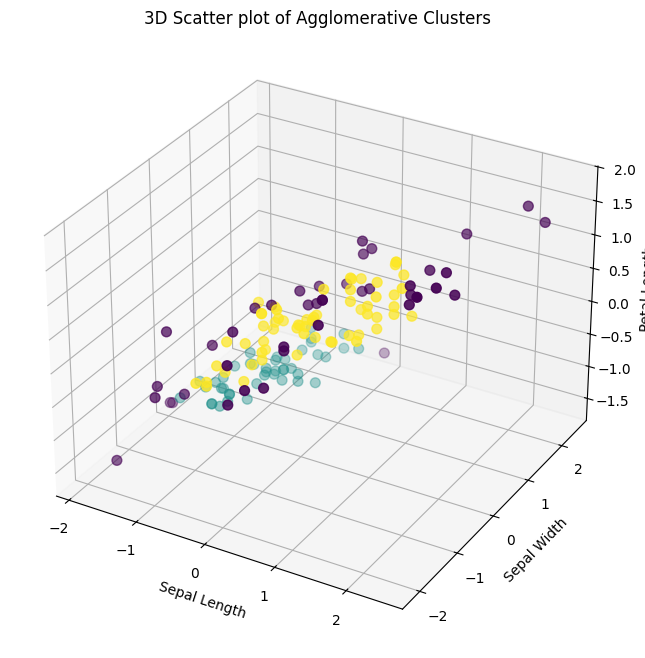

In [162]:
# to visualize in3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_scaled_data_dbscan['sepal length (cm)'], iris_scaled_data_dbscan['sepal width (cm)'], iris_scaled_data_dbscan['petal length (cm)'], c=iris_scaled_data_dbscan['dbscan_cluster'], cmap='viridis', s=50)
ax.set_xlabel('Sepal Length')   
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter plot of Agglomerative Clusters')
plt.show()

Kmeans cluster basically a distnace based especially centroid base.in Kmeans ,using elbow method we can identify the number of cluster.But in Agglomeraticve hierecahical clustering,the concept is bottom up ie each point is considered as a cluster and using various klinkage methods,identify the neighbours and building up the clsutrers.Number of clusters can be identified with the help of dendrograms.In DBSCAN ,we can identify or group the outliers seperately but in agglomerative,its not.Divisive is just the opposite of agglomerative

- By comparing the three Kmeans is the one which gives high performnace in terms of silhouettes score